

---



# **Тема:** Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании.

Решаем задачу прогноза удовлетворенности клиента авиакомпании полетом.

*Прим.:* в данной части проводится только разведочный анализ данных.

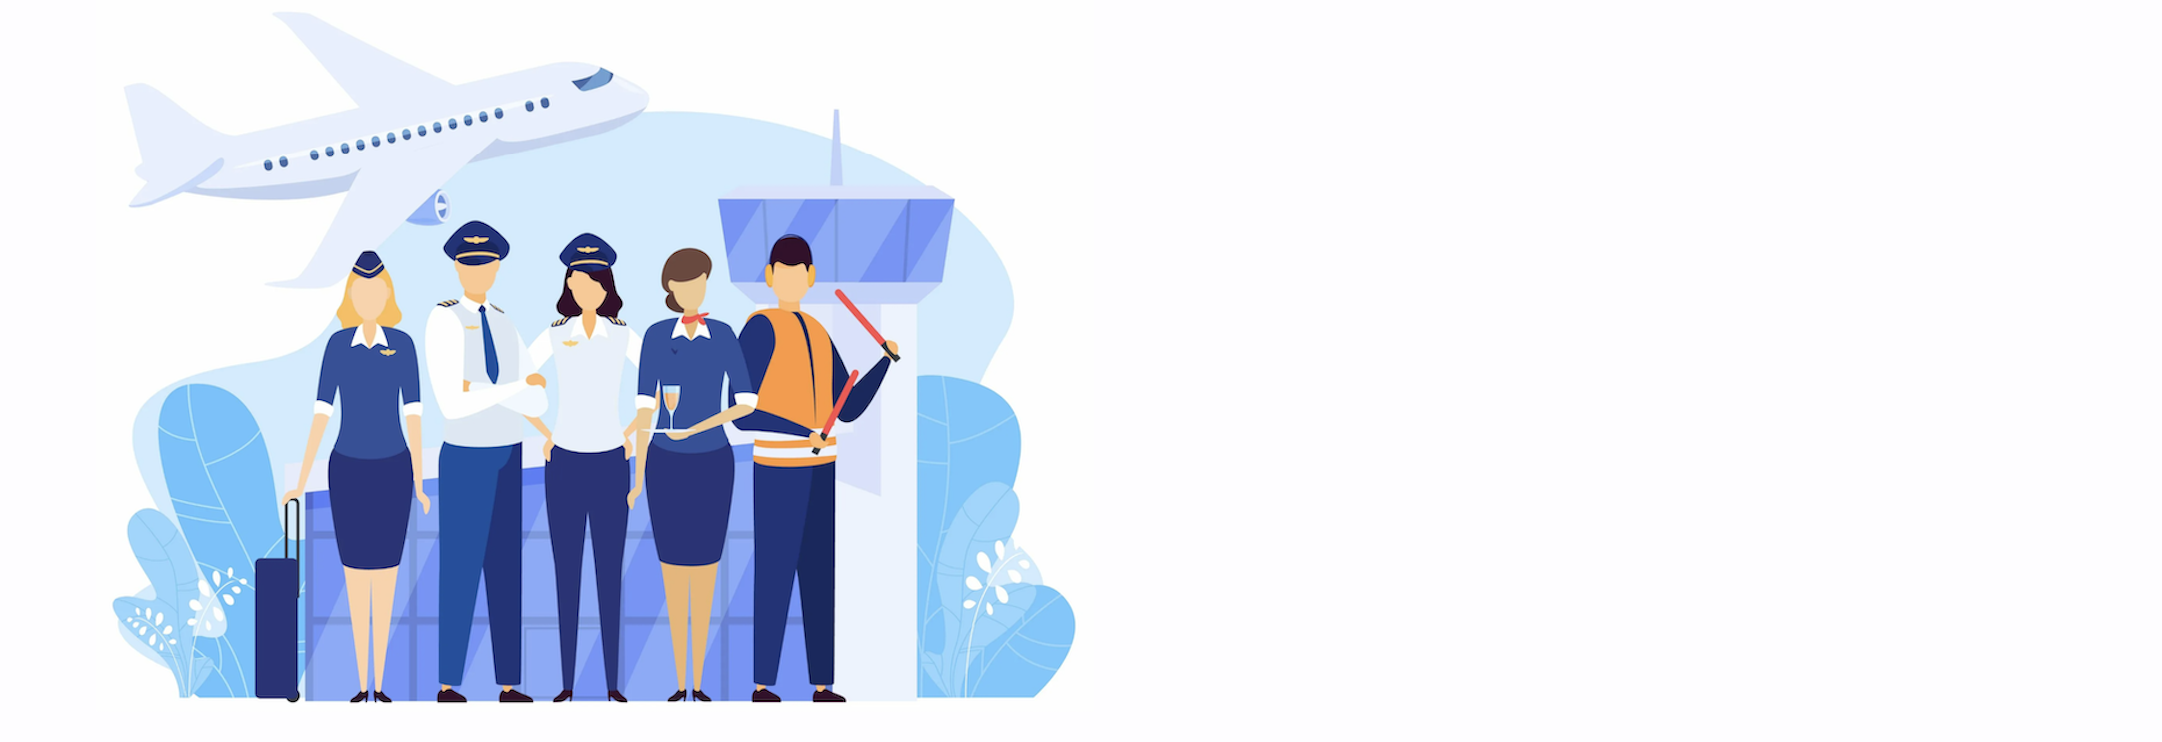



---



## Импорт библиотек, константы

In [1048]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1049]:
RANDOM_STATE = 42

In [1050]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

Здесь представлено 2 варианта загрузки датасета

- 1-ый наиболее простой, датасет загружается из открытого репозитория Github стороннего владельца

- 2-ой на случай, если первый вдруг не заработает (например, владелец репозитория решит удалить репозиторий),  загружает данные из таблицы 'airline_clients.csv', предварительно загруженной в "Файлы" тетрадки

Саму таблицу можно найти в моём репозитории на Github, в том же самом репозитории, в котором Вы нашли эту тетрадку :)

In [1051]:
# загрузка данных
df = pd.read_csv(DATASET_PATH) # вариант 1
'''df = pd.read_csv('airline_clients.csv')''' # вариант 2

"df = pd.read_csv('airline_clients.csv')"

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [1052]:
# (псевдо)случайные 5 записей
df.sample(5, random_state=RANDOM_STATE).transpose()

,103044,43282,65543,65083,76496
id,103045,43283,65544,65084,76497
Gender,Male,Male,Male,Male,Male
Age,23.0,38.0,33.0,68.0,27.0
Customer Type,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer
Type of Travel,Business travel,Business travel,Business travel,Personal Travel,Business travel
Class,Eco,Eco,Business,Eco,Business
Flight Distance,546.0,531.0,237.0,224.0,516.0
Departure Delay in Minutes,0.0,0.0,0.0,0.0,7.0
Arrival Delay in Minutes,0.0,0.0,3.0,0.0,0.0
Inflight wifi service,3.0,5.0,3.0,4.0,5.0


## Исследование данных

Размер нашего датасета

In [1053]:
df.shape

(129880, 24)

In [1054]:
original_size = df.shape[0]
print(f'Размер датасета составляет {original_size}')

Размер датасета составляет 129880


Информация о столбцах: типах данных и наличии пропусков

In [1055]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

Посмотрим ещё значения различных интересных характеристик для столбцов

In [1056]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,129880.0,NaN,NaN,NaN,64940.5,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Gender,129549,2,Female,65726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,129564.0,NaN,NaN,NaN,40.113951,20.36519,0.0,27.0,40.0,51.0,621.0
Customer Type,129803,2,Loyal Customer,106040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Travel,129779,2,Business travel,89625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,129764,3,Business,62103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,129786.0,NaN,NaN,NaN,1323.385804,4516.19153,0.0,414.0,846.0,1744.0,379620.0
Departure Delay in Minutes,129773.0,NaN,NaN,NaN,15.811301,93.206139,0.0,0.0,0.0,12.0,22227.0
Arrival Delay in Minutes,129371.0,NaN,NaN,NaN,16.651406,109.167328,0.0,0.0,0.0,13.0,14006.0
Inflight wifi service,129835.0,NaN,NaN,NaN,2.732183,1.359786,0.0,2.0,3.0,4.0,45.0


И ещё немного занимательного: взглянем на аналог корреляции для категориальных признаков

In [1057]:
!pip install association_metrics

In [1058]:
import association_metrics as am
XC = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)
cramersv = am.CramersV(XC)
cramersv.fit()

,Gender,Customer Type,Type of Travel,Class,satisfaction
Gender,1.000000,0.030782,0.009440,0.012668,0.010934
Customer Type,0.030782,1.000000,0.308207,0.123171,0.167660
Type of Travel,0.009440,0.308207,1.000000,0.554107,0.401982
Class,0.012668,0.123171,0.554107,1.000000,0.319327
satisfaction,0.010934,0.167660,0.401982,0.319327,1.000000


### satisfaction

Столбец 'satisfaction' содержит нашу целевую переменную. По описанию он содержит удовлетворенность клиента полетом, бинарную величину (*satisfied* или *neutral or dissatisfied*). Проверим, как дела обстоят на практике

In [1059]:
df['satisfaction'].value_counts(dropna=False)

neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: satisfaction, dtype: int64

Так, видим, что есть достаточно значительная часть клиентов (около одной пятой от всех), не определившихся, довольны ли они сервисом или нет. Переименуем их в отдельную категорию 'undecided'

In [1060]:
df['satisfaction'].replace({'-':'undecided'}, inplace=True)

Проверочка, что всё корректно сработало

In [1061]:
df['satisfaction'].value_counts(dropna=False)

neutral or dissatisfied    58879
satisfied                  45025
undecided                  25976
Name: satisfaction, dtype: int64

Отлично! Теперь перейдём к нашим признакам

### Id

В столбце 'id' должны располагаться порядковые номера строк, начиная с 1 (единицы). Проверим, что всё так

In [1062]:
ids = list(df['id'])
is_ok = True
for i in range(len(ids)):
  if i + 1 != ids[i]:
    is_ok = False
    print(f'Порядок сбился на строке с порядковым номером {i + 1} и id = {ids[i]}')
if is_ok:
  print("Столбец 'id' пронумерован в верном порядке на всех строках")

Столбец 'id' пронумерован в верном порядке на всех строках


Всё хорошо! Правда, это вспомогательный столбец, не несущий никакой смысловой нагрузки, поэтому в дальнейшем он нам не потребуется. Удалим его

In [1063]:
df.drop('id', axis=1, inplace=True)

Проверим, что всё удалось правильно

In [1064]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129549 non-null  object 
 1   Age                                129564 non-null  float64
 2   Customer Type                      129803 non-null  object 
 3   Type of Travel                     129779 non-null  object 
 4   Class                              129764 non-null  object 
 5   Flight Distance                    129786 non-null  float64
 6   Departure Delay in Minutes         129773 non-null  float64
 7   Arrival Delay in Minutes           129371 non-null  float64
 8   Inflight wifi service              129835 non-null  float64
 9   Departure/Arrival time convenient  129831 non-null  float64
 10  Ease of Online booking             129837 non-null  float64
 11  Gate location                      1298

Всё по плану

### Gender

В столбце 'Gender' должен располагаться пол клиента: Male/Female. Проверим, что реальные данные соответствуют описанию.

In [1065]:
df['Gender'].value_counts(dropna=False)

Female    65726
Male      63823
NaN         331
Name: Gender, dtype: int64

Хм, нехорошо. У нас есть данные 331 респондентов, не указавших свой пол. Посмотрим, насколько это много в процентном соотношении

In [1066]:
# смотрим долю
df['Gender'].value_counts(dropna=False, normalize=True)

Female    0.506052
Male      0.491400
NaN       0.002549
Name: Gender, dtype: float64

In [1067]:
# смотрим процентное соотношение
nan_part_g = df['Gender'].value_counts(dropna=False, normalize=True)[2]
nan_part_g *= 100 # %
nan_part_g

0.25485063135201724

Получается, что число данных о респондентах, не указавших свой пол, составляет менее 1% (0.25% < 1%) от всей выборки. В таком случае можно смело удалять строки с пропусками, и я собиралась так и сделать изначально.

Но, с другой стороны, может, это небинарные персоны, люди, не относящие себя к традиционным Male/Female (М/Ж) полам? Всё-таки мы живём в современном мире и политика компании наверняка толерантна к таковым клиентам (иначе - потеря потенциальной прибыли, а бизнес есть бизнес).

Поэтому, пожалуй, разумнее будет выделить данных клиентов в отдельную категорию

In [1068]:
df['Gender'].fillna("Non-binary", inplace=True)

Проверяем, что всё удалось правильно

In [1069]:
df['Gender'].value_counts(dropna=False)

Female        65726
Male          63823
Non-binary      331
Name: Gender, dtype: int64

Да, ура, теперь описания значений в столбце 'Gender' больше похожи на правду!

Текущий размер нашего датафрейма:

Взглянем на распределение клиентов по гендеру с помощью простой столбчатой диаграммы

Text(0.5, 1.0, 'Distribution of clients by gender')

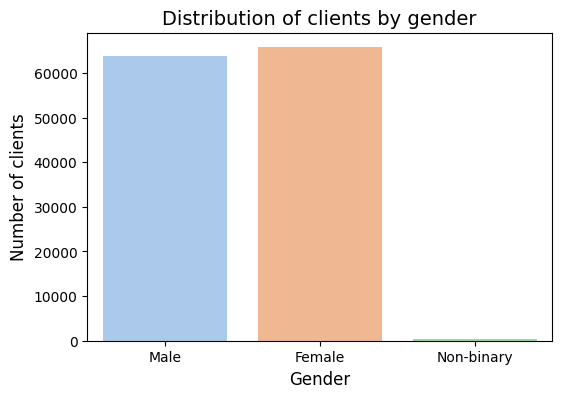

In [1070]:
plt.figure(figsize=(6,4))

sns.countplot(x='Gender', data = df, palette='pastel')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)
plt.title('Distribution of clients by gender', fontsize=14)

Третий столбец с количеством небинарных персон еле заметен на фоне других двух сейчас.

Но кто знает, как изменится ситуация в будущем...

### Age

В данном столбце располагается количество полных лет клиента. Смотрим распределение

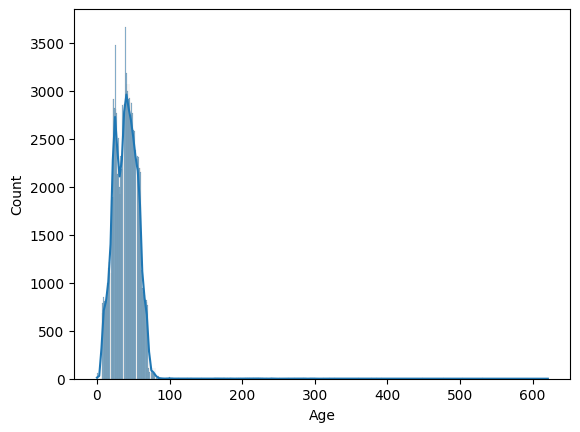

In [1071]:
sns.histplot(df['Age'], kde=True)
plt.show()

Смотрим описание

In [1072]:
df['Age'].describe()

count    129564.000000
mean         40.113951
std          20.365190
min           0.000000
25%          27.000000
50%          40.000000
75%          51.000000
max         621.000000
Name: Age, dtype: float64

Здорово, у нас есть клиенты, которым 0 лет и клиенты, которым аж 621 год! Ещё бы добавились клиенты с отрицательным числом лет, было бы совсем идеально

In [1073]:
# смотрим нижнюю границу возраста
df.groupby(pd.cut(df['Age'], np.arange(-6, 18, 6))).count()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Age,,,,,,,,,,,,,,,,,,,,,
"(-6, 0]",59,59,59,59,59,59,59,58,59,59,...,59,59,59,59,59,59,59,59,59,59
"(0, 6]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(6, 12]",4755,4755,4753,4750,4752,4752,4748,4729,4755,4754,...,4755,4754,4754,4752,4754,4754,4755,4755,4752,4755


Правда, по правилам авиакомпании данные собирать можно только у клиентов с 6 лет (невключительно, судя по данным), а старейший человек на Земле прожил 122 года. Поэтому придётся обозначить всем остальным средний возраст опрошенных клиентов

In [1074]:
# изначально присваиваем всем негодным, чей возраст > 122 значение 0
df['Age'].mask(df['Age'] > 122, 0, inplace=True)
# теперь тем, кто указал возраст < 14 тоже принудительно ставим значение 0
df['Age'].mask(df['Age'] <= 6, 0, inplace=True)

# вычисляем среднее среди ненулевых значений
age_mean = np.round(df[df['Age'] > 0]['Age'].mean())
print(f'Средний возраст среди близко к достоверному указавших возраст клиентов равен {age_mean}')

# присваиваем всем негодникам (и заодно указавшим NaN значения) полученный средний возраст
df['Age'].mask(df['Age'] == 0, age_mean, inplace=True)
df['Age'].fillna(age_mean, inplace=True)

Средний возраст среди близко к достоверному указавших возраст клиентов равен 39.0


Проверяем себя, смотрим, что получилось

In [1075]:
df['Age'].describe()

count    129880.000000
mean         39.476763
std          15.168656
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max         120.000000
Name: Age, dtype: float64

Ну всё, вроде как избавились от аномальных значений, а пропусков изначально не было. Идём дальше, построим боксплоты/ящики с усами зависимостей возраста клиента от его гендера!

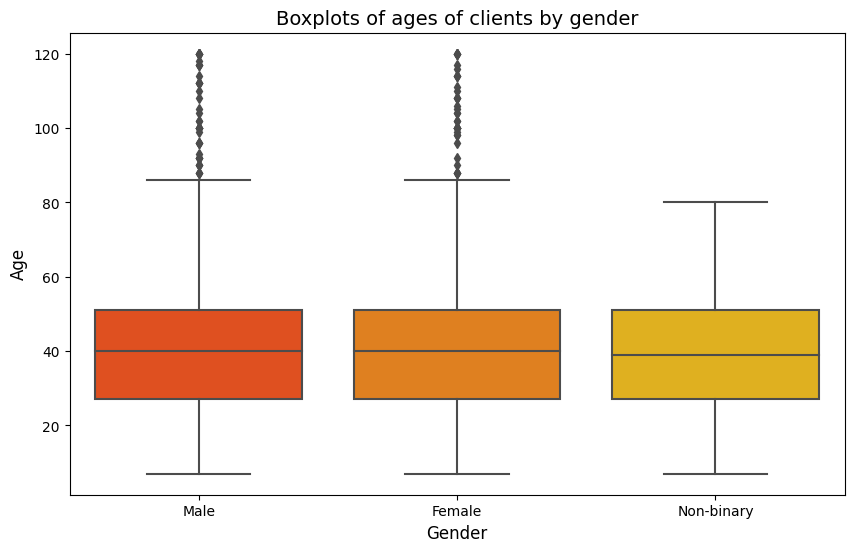

In [1076]:
plt.figure(figsize = (10,6))

sns.boxplot(x="Gender", y="Age", data=df, palette='autumn')

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Boxplots of ages of clients by gender', fontsize=14)
plt.show()

И взглянем теперь, после очистки данных, на распределение

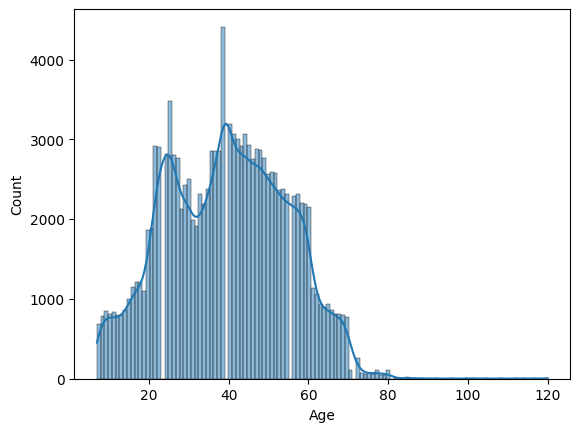

In [1077]:
sns.histplot(df['Age'], kde=True)
plt.show()

### Customer Type

Отражает лояльность клиента авиакомпании, всего 2 значения: Loyal Customer или disloyal Customer.

In [1078]:
df['Customer Type'].value_counts(dropna=False)

Loyal Customer       106040
disloyal Customer     23763
NaN                      77
Name: Customer Type, dtype: int64

У нас 77 значений клиентов без данных о лояльности. Смотрим сколько это в процентном соотношении

In [1079]:
# доля
df['Customer Type'].value_counts(dropna=False, normalize=True)

Loyal Customer       0.816446
disloyal Customer    0.182961
NaN                  0.000593
Name: Customer Type, dtype: float64

In [1080]:
# процентное соотношение
nan_part_ct = df['Customer Type'].value_counts(dropna=False, normalize=True)[2]
nan_part_ct *= 100 # %
nan_part_ct

0.05928549430243302

Выходит, что в процентном соотношении это очень мало, всего почти 0.06%. Поэтому снова выберем самый лёгкий способ решения проблемы, не будем выделять NaN значения в отдельную категорию, а возьмём и удалим их.

In [1081]:
df.dropna(subset=['Customer Type'], inplace=True)

Проверка, что всё корректно

In [1082]:
df['Customer Type'].value_counts(dropna=False)

Loyal Customer       106040
disloyal Customer     23763
Name: Customer Type, dtype: int64

Класс!

Визуализируем связь возраста клиента и его лояльности. На графике изображены для каждой категории:

* средний возраст
* доверительный интервал для среднего с вероятностью 95%

Text(0.5, 1.0, 'Distribution of customer type by age')

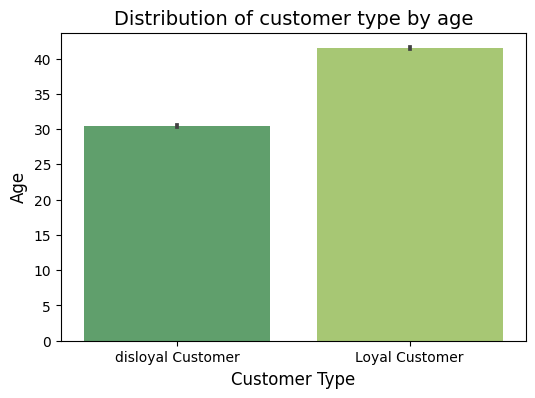

In [1083]:
plt.figure(figsize=(6,4))

sns.barplot(x='Customer Type', y='Age', data = df, palette='summer')
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Distribution of customer type by age', fontsize=14)

*Проведём бинаризацию столбца.* *Заменим значения 'disloyal Customer'* *на нолики - 0, а* *'Loyal Customer' на единички - 1.*

In [1084]:
# проводим бинаризацию
df['Customer Type'] = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)

# смотрим, что вышло
df['Customer Type'].value_counts(dropna=False)

1    106040
0     23763
Name: Customer Type, dtype: int64

Всё удалось

### Type of Travel

Здесь у нас данные о типе поездки клиента: Business travel или Personal Travel

In [1085]:
df['Type of Travel'].value_counts(dropna=False)

Business travel    89568
Personal Travel    40134
NaN                  101
Name: Type of Travel, dtype: int64

Тут тоже есть NaN значения, но их совсем немного. Посмотрим на долю и на процентное соотношение

In [1086]:
# доля
df['Type of Travel'].value_counts(dropna=False, normalize=True)

Business travel    0.690030
Personal Travel    0.309192
NaN                0.000778
Name: Type of Travel, dtype: float64

In [1087]:
# процентное соотношение
nan_part_tot = df['Type of Travel'].value_counts(dropna=False, normalize=True)[2]
nan_part_tot *= 100 # %
nan_part_tot

0.07781022010277112

Выходит, что в процентном соотношении этих значений очень мало, менее 0.08%. Поступим-ка также, как и в прошлом пункте, с последним рассмотренным признаком. Удалим NaN значения

In [1088]:
# удаление
df.dropna(subset=['Type of Travel'], inplace=True)

# проверка
df['Type of Travel'].value_counts(dropna=False)

Business travel    89568
Personal Travel    40134
Name: Type of Travel, dtype: int64

*И заменим значения столбца на бинарные:*

- *1 - для персонального типа поездки, 'Personal Travel'*
- *0 - для 'Business travel'*

In [1089]:
# проводим бинаризацию
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 1 if x == 'Personal Travel' else 0)

# смотрим, что вышло
df['Type of Travel'].value_counts(dropna=False)

0    89568
1    40134
Name: Type of Travel, dtype: int64

### Class

Тут информация о классе обслуживания клиента в самолете

In [1090]:
df['Class'].value_counts(dropna=False)

Business    62015
Eco         58187
Eco Plus     9384
NaN           116
Name: Class, dtype: int64

Снова есть пропущенные значения, смотрит сколько их в процентном соотношении

In [1091]:
# доля
df['Class'].value_counts(dropna=False, normalize=True)

Business    0.478134
Eco         0.448621
Eco Plus    0.072350
NaN         0.000894
Name: Class, dtype: float64

In [1092]:
# процентное соотношение
nan_part_class = df['Class'].value_counts(dropna=False, normalize=True)[3]
nan_part_class *= 100 # %
nan_part_class

0.08943578356540377

Получаем, что NaN значений ожидаемо очень мало, меньше 1% (0.089% < 1%), так что можем спокойно пренебречь ими, удалив их

In [1093]:
# удаление
df.dropna(subset=['Class'], inplace=True)

# проверка
df['Class'].value_counts(dropna=False)

Business    62015
Eco         58187
Eco Plus     9384
Name: Class, dtype: int64

Взглянем на несложную столбчатую диаграмму, иллюстрирующущю количество клиентов в каждом классе обслуживания

Text(0.5, 1.0, 'Distribution of clients by class')

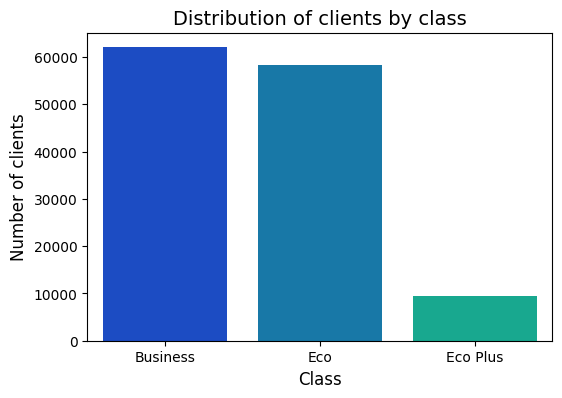

In [1094]:
plt.figure(figsize=(6,4))

sns.countplot(x='Class', data = df, palette='winter')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)
plt.title('Distribution of clients by class', fontsize=14)

Интересно, класс 'Eco Plus' не слишком популярен у людей в сравнении с классами 'Business' и 'Eco'. Возможно такая ситуация произошла из-за незнания клиентов о существовании такого класса (и тогда можно попробовать исправить ситуацию, влив средства в рекламу), либо данный класс не слишком соотносится по цене и числу/качеству предоставляемых благ в сравнении с другими 2-мя классами (либо что-то ещё). Думаю, эти цифры могут быть полезны аналитикам

### Flight Distance

Столбец описывает дальность перелета (в милях)

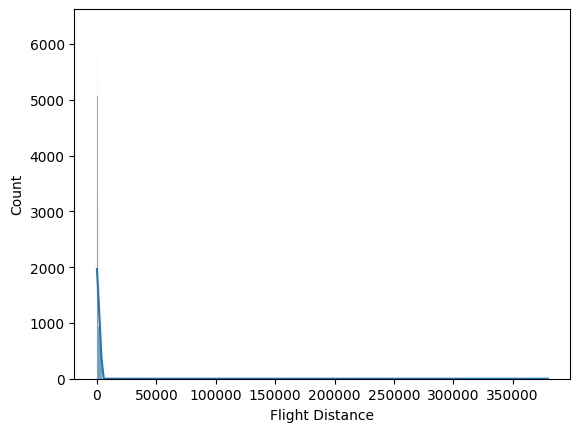

In [1095]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

In [1096]:
df['Flight Distance'].describe()

count    129492.000000
mean       1323.646550
std        4521.031728
min           0.000000
25%         414.000000
50%         846.000000
75%        1744.000000
max      379620.000000
Name: Flight Distance, dtype: float64

In [1097]:
df['Flight Distance'].value_counts(dropna=False)

337.0       838
594.0       504
404.0       480
862.0       473
2475.0      467
           ... 
778.0         1
1347.0        1
1151.0        1
1405.0        1
110121.0      1
Name: Flight Distance, Length: 4060, dtype: int64

Нарисуем errorbar, используя standard deviation (обычное стандартное отклонение)

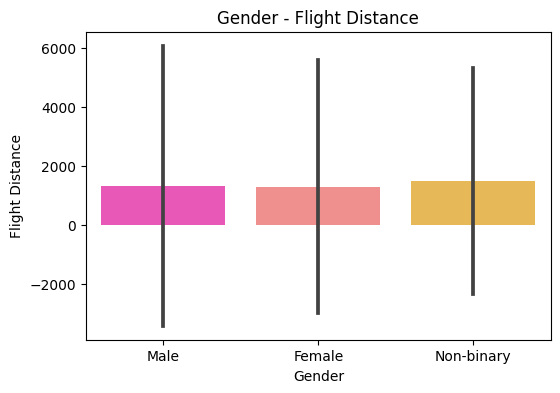

In [1098]:
plt.figure(figsize=(6,4))

sns.barplot(x='Gender', y='Flight Distance', errorbar = "sd", data = df, palette='spring')
plt.title('Gender - Flight Distance')
plt.show()

И поглядим на боксплот

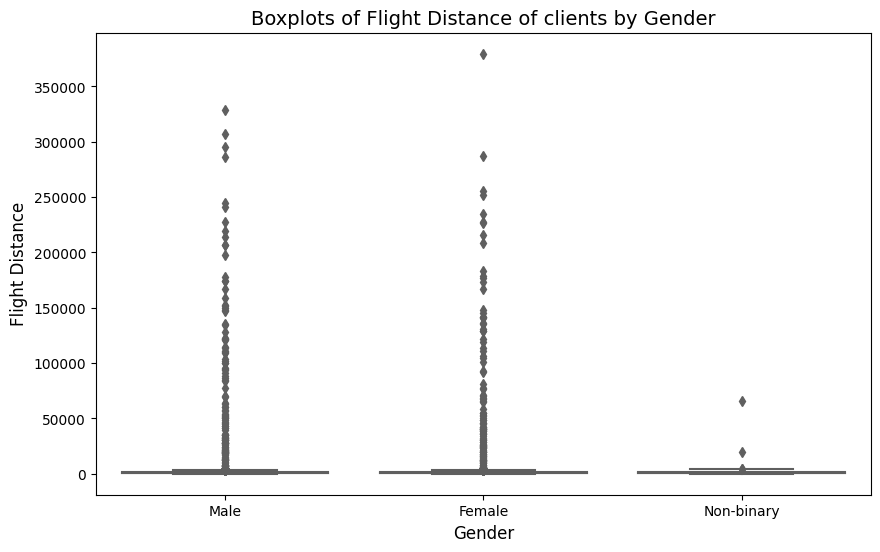

In [1099]:
plt.figure(figsize = (10,6))

sns.boxplot(x="Gender", y="Flight Distance", data=df, palette='spring')

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Flight Distance', fontsize=12)
plt.title('Boxplots of Flight Distance of clients by Gender', fontsize=14)
plt.show()

Википедия говорит, что самым коротким коммерческим рейсом считается рейс, преодолевающий 1,7 миль, а самым продолжительным - рейс, преодолевший почти 8500 миль.

На всякий случай, возьмём нижней адекватной границей дальность полёта в 1 милю, а верхней - в 10000 миль.

Посмотрим, сколько у нас аномальных значений

In [1100]:
# значения < 1 (<=> значения <= 0)
abnormal_lower_values = df['Flight Distance'].groupby(pd.cut(df['Flight Distance'], np.arange(-1, 1, 1))).count()[0]
df.groupby(pd.cut(df['Flight Distance'], np.arange(-1, 1, 1))).count()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Flight Distance,,,,,,,,,,,,,,,,,,,,,
"(-1, 0]",4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Метод "describe()" ранее показал нам, что минимальное значение среди имеющихся числовых равно 0. Теперь мы видим, что нулевых значений всего 4

In [1101]:
# значения > 10000
abnormal_upper_values = list(df['Flight Distance'].groupby(pd.cut(df['Flight Distance'], np.arange(10000, 410001, 400000))).count())[0]
df.groupby(pd.cut(df['Flight Distance'], np.arange(10000, 410001, 400000))).count()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Flight Distance,,,,,,,,,,,,,,,,,,,,,
"(10000, 410000]",214,214,214,214,214,214,214,213,214,214,...,214,214,214,213,214,214,214,213,214,214


А вот значений, превышающих максимально разумное - 214

Посмотрим ещё количество NaN значений

In [1102]:
missed_values = df['Flight Distance'].isna().sum()
missed_values

94

И того суммарно аномальных значений в данном признаке у нас (пропущенные значения входят в аномальные)

In [1103]:
total_bad_values = abnormal_lower_values + abnormal_upper_values
total_bad_values

218

Ага, их 4 + 214 = 218

В процентном соотношении это

In [1104]:
(total_bad_values / df.shape[0]) * 100

0.16822804932631613

Это менее 1% (0.17% < 1%). В таком случае, пожалуй, лучше всего будет удалить эти значения, чтобы не сбивать общую статистику по дальности полётов

In [1105]:
# удаляем значения меньше нижней числовой границы (< 1)
df.drop(df.index[df['Flight Distance'] < 1.0], inplace = True)

# удаляем значения больше верхней числовой границы (> 10000)
df.drop(df.index[df['Flight Distance'] > 10000.0], inplace = True)

# удаляем NaN значения
df.dropna(subset=['Flight Distance'], inplace=True)

# смотрим, что получилось
df['Flight Distance'].describe()

count    129274.000000
mean       1191.169910
std        1000.190939
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        9900.000000
Name: Flight Distance, dtype: float64

И посмотрим на обновлённое распределение

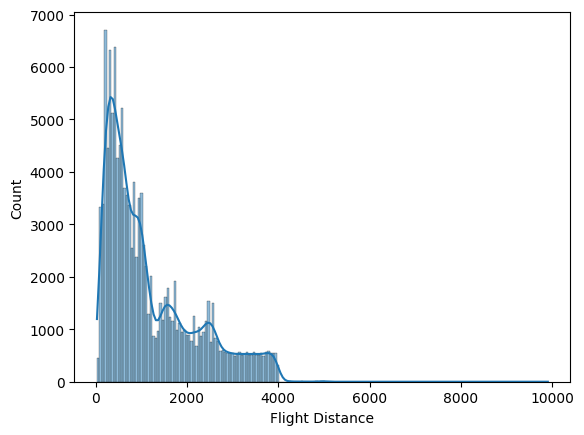

In [1106]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

И на обновлённый боксплот

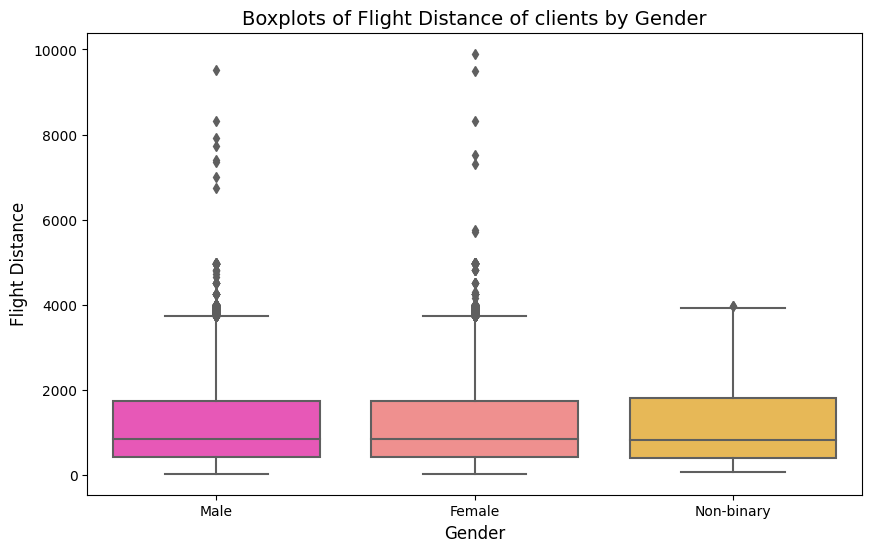

In [1107]:
plt.figure(figsize = (10,6))

sns.boxplot(x="Gender", y="Flight Distance", data=df, palette='spring')

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Flight Distance', fontsize=12)
plt.title('Boxplots of Flight Distance of clients by Gender', fontsize=14)
plt.show()

Ну вот, теперь всё выглядит разумно, мы избавились от совсем аномальных и NaN значений

### Departure Delay in Minutes

Описывает задержку отправления (неотрицательная величина)

In [1108]:
df['Departure Delay in Minutes'].describe()

count    129167.000000
mean         15.809603
std          93.393754
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max       22227.000000
Name: Departure Delay in Minutes, dtype: float64

Тут как раз нулевые значения - это хорошо, нам не надо с ними ничего делать. Наоборот, пусть их будет побольше, пусть рейсы почаще не задерживаются!

А сколько же у нас NaN значений, давайте посмотрим

In [1109]:
df['Departure Delay in Minutes'].isna().sum()

107

А сколько "больших" значений?

In [1110]:
df.groupby(pd.cut(df['Departure Delay in Minutes'], np.arange(0, 24000, 1500))).count()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Departure Delay in Minutes,,,,,,,,,,,,,,,,,,,,,
"(0, 1500]",56175,56175,56175,56175,56175,56175,56175,55879,56153,56152,...,56156,56145,56158,56154,56159,56152,56161,56148,56162,56175
"(1500, 3000]",16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,15,16,16
"(3000, 4500]",8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
"(4500, 6000]",2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
"(6000, 7500]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(7500, 9000]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(9000, 10500]",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(10500, 12000]",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(12000, 13500]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Что ж, учитывая отсутствие данных о самой долгой задержке рейса от авиакомпании, попробуем оценить верхнюю границу вручную. Не забывая, что 1 день = 24 часа = 1440 минут.

Благодаря результату запуска ячейки кода выше, мы видим наличие явных выбросов, например, в диапазонах (21000, 22500], (9000, 10500] и (10500, 12000].

Но уже более сомнительно стоит ли принимать за выбросы значения в диапазонах (3000, 4500] и (4500, 6000]. Из-за их малого количества, я всё-таки принимаю решение считать их выбросами. Но в реальности здесь стоило бы посоветоваться с экспертами, или возможно сотрудниками авиакомпании, отвечающими за данный показатель

Итого верхняя граница допустимого диапазона значений описываемого признака = 3000 включительно.

Удалим все выбросы и NaN значения ввиду их малого количества

In [1111]:
# удаляем значения больше верхней числовой границы (> 3000)
df.drop(df.index[df['Departure Delay in Minutes'] > 3000.0], inplace = True)

# удаляем NaN значения
df.dropna(subset=['Departure Delay in Minutes'], inplace=True)

# смотрим, что получилось
df['Departure Delay in Minutes'].describe()

count    129154.000000
mean         15.188140
std          46.268827
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        2604.000000
Name: Departure Delay in Minutes, dtype: float64

Класс, теперь максимальная задержка отправления в наших данных равна 2604 минуты, что составляет 43,4 часа, что есть 1 день и 19,4 часа. Я считаю, что звучит реалистично

### Arrival Delay in Minutes

Описывает задержку прибытия (неотрицательная величина). Тут логика такая же, как и в работе с предыдущим признаком

In [1112]:
df['Arrival Delay in Minutes'].describe()

count    128649.000000
mean         16.645773
std         109.434534
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max       14006.000000
Name: Arrival Delay in Minutes, dtype: float64

Количество NaN значений

In [1113]:
df['Arrival Delay in Minutes'].isna().sum()

505

Пытаемся установить верхнюю границу

In [1114]:
df.groupby(pd.cut(df['Arrival Delay in Minutes'], np.arange(0, 15000, 1000))).count()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Arrival Delay in Minutes,,,,,,,,,,,,,,,,,,,,,
"(0, 1000]",56318,56318,56318,56318,56318,56318,56318,56318,56293,56293,...,56302,56290,56299,56301,56296,56295,56300,56287,56302,56318
"(1000, 2000]",17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
"(2000, 3000]",12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
"(3000, 4000]",5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
"(4000, 5000]",3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
"(5000, 6000]",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(6000, 7000]",3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
"(7000, 8000]",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(8000, 9000]",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Тут как будто тоже разумно будет поставить верхней границей 3000 включительно. А нижняя не нужна, числа и так неотрицательные, нулевые значения нам нужны!

Удалим все выбросы и NaN значения

In [1115]:
# удаляем значения больше верхней числовой границы (> 3000)
df.drop(df.index[df['Arrival Delay in Minutes'] > 3000.0], inplace = True)

# удаляем NaN значения
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

# смотрим, что получилось
df['Arrival Delay in Minutes'].describe()

count    128629.000000
mean         15.545701
std          47.943667
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        2940.000000
Name: Arrival Delay in Minutes, dtype: float64

Отлично, теперь максимальная задержка прибытия в наших данных равна 2940 минут, что составляет 49 часов, что есть 2 дня и 1 час. В целом ок

Посмотрим-ка ещё корреляцию столбцов 'Departure Delay in Minutes' и 'Arrival Delay in Minutes'.

<Axes: >

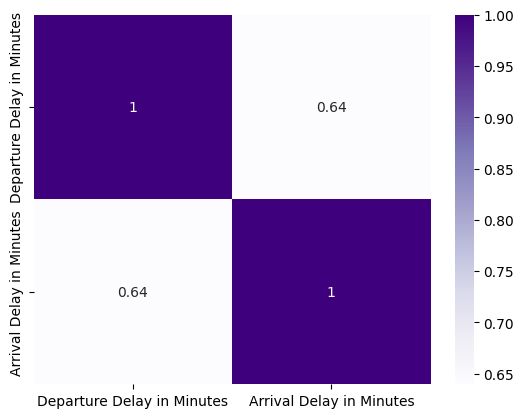

In [1116]:
df0 = df.loc[:, ['Departure Delay in Minutes', 'Arrival Delay in Minutes']]

corr0 = df0.corr()
sns.heatmap(corr0, cmap="Purples", annot=True)

Что ж, заметная линейная зависимость есть, но не очень высокая, как можно было бы ожидать

### Inflight wifi service

Столбец иллюстрирует оценку клиентом интернета на борту. Посмотрим на значения

In [1117]:
df['Inflight wifi service'].describe()

count    128584.000000
mean          2.732315
std           1.360015
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          45.000000
Name: Inflight wifi service, dtype: float64

In [1118]:
df['Inflight wifi service'].value_counts(dropna=False)

2.0     31998
3.0     31867
4.0     24509
1.0     22081
5.0     14208
0.0      3887
NaN        45
6.0         7
21.0        4
7.0         3
16.0        3
12.0        3
20.0        2
24.0        2
40.0        2
18.0        1
30.0        1
8.0         1
28.0        1
25.0        1
45.0        1
10.0        1
15.0        1
Name: Inflight wifi service, dtype: int64

Несложно заметить наличие аномальных значений. Судя по данным, оценивать предполагалось баллами от 0 до 5 включительно. Заменим все значения, превосходящие 5 (> 5) на 5.

In [1119]:
df['Inflight wifi service'].mask(df['Inflight wifi service'] > 5, 5, inplace=True)

Смотрим, что вышло

In [1120]:
df['Inflight wifi service'].value_counts(dropna=False)

2.0    31998
3.0    31867
4.0    24509
1.0    22081
5.0    14242
0.0     3887
NaN       45
Name: Inflight wifi service, dtype: int64

Теперь заменим NaN значения на среднее среди числовых значений

In [1121]:
# вычисляем среднее среди числовых значений
iws_mean = np.round(df[df['Inflight wifi service'] != 'object']['Inflight wifi service'].mean())
print(f'Среднее оценок примерно равно {iws_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Inflight wifi service'].fillna(iws_mean, inplace=True)

# смотрим, что вышло
df['Inflight wifi service'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


2.0    31998
3.0    31912
4.0    24509
1.0    22081
5.0    14242
0.0     3887
Name: Inflight wifi service, dtype: int64

Среднее, конечно, ожидаемое, зато теперь всё хорошо!

*Для простоты решила оставить все оценки числовыми признаками, так как такой вариант всё ещё отражает их суть.*

*И, как мне кажется (очень имхо), отражает их суть лучше, чем возможное представление этих значений как категориальных признаков.*


Для чистоты эксперименты в будущем можно попробовать рассмотреть их как категориальные признаки. Но пока что оставляем числовыми.

***Дальше со всеми оценками будет выполняться та же работа, что и в данном блоке, поэтому описаний будет поменьше***

*Чтобы не пропустить возможные нестандартные случаи (например, что в каком-то признаке баллы предполагалось оценивать не от 0 до 5 включительно, а от 0 до 3 включительно, как вариант), каждый признак будет рассматриваться отдельно последовательно вручную, а не в цикле*

*спойлер: действительно, оказалось, что в ряде признаков, судя по данным, баллы предполагалось оценивать в диапазоне от 1 до 5 включительно, а не от 0 до 5 включительно, как в данном случае*

### Departure/Arrival time convenient

Столбец иллюстрирует оценку клиентом удобства времени прилета и вылета

In [1122]:
df['Departure/Arrival time convenient'].describe()

count    128580.000000
mean          3.062591
std           1.559702
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          45.000000
Name: Departure/Arrival time convenient, dtype: float64

In [1123]:
df['Departure/Arrival time convenient'].value_counts(dropna=False)

4.0     31567
5.0     27723
3.0     22144
2.0     21298
1.0     19181
0.0      6628
NaN        49
12.0        6
8.0         5
30.0        4
9.0         4
6.0         3
20.0        2
14.0        2
16.0        2
35.0        2
27.0        2
45.0        1
24.0        1
28.0        1
40.0        1
32.0        1
7.0         1
10.0        1
Name: Departure/Arrival time convenient, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 0 до 5 включительно.

In [1124]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Departure/Arrival time convenient'].mask(df['Departure/Arrival time convenient'] > 5, 5, inplace=True)

# глядим на результат наших действий
df['Departure/Arrival time convenient'].value_counts(dropna=False)

4.0    31567
5.0    27762
3.0    22144
2.0    21298
1.0    19181
0.0     6628
NaN       49
Name: Departure/Arrival time convenient, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1125]:
# вычисляем среднее среди числовых значений
dtc_mean = np.round(df[df['Departure/Arrival time convenient'] != 'object']['Departure/Arrival time convenient'].mean())
print(f'Среднее оценок примерно равно {dtc_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Departure/Arrival time convenient'].fillna(dtc_mean, inplace=True)

# смотрим, что вышло
df['Departure/Arrival time convenient'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


4.0    31567
5.0    27762
3.0    22193
2.0    21298
1.0    19181
0.0     6628
Name: Departure/Arrival time convenient, dtype: int64

### Ease of Online booking

Столбец иллюстрирует оценку клиентом удобства онлайн-бронирования

In [1126]:
df['Ease of Online booking'].describe()

count    128586.000000
mean          2.760845
std           1.431142
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          45.000000
Name: Ease of Online booking, dtype: float64

In [1127]:
df['Ease of Online booking'].value_counts(dropna=False)

3.0     30091
2.0     29763
4.0     24176
1.0     21632
5.0     17261
0.0      5633
NaN        43
12.0        4
18.0        4
24.0        3
8.0         3
16.0        2
32.0        2
10.0        2
14.0        1
28.0        1
15.0        1
6.0         1
9.0         1
21.0        1
45.0        1
36.0        1
40.0        1
20.0        1
Name: Ease of Online booking, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 0 до 5 включительно.

In [1128]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Ease of Online booking'].mask(df['Ease of Online booking'] > 5, 5, inplace=True)

# глядим на результат наших действий
df['Ease of Online booking'].value_counts(dropna=False)

3.0    30091
2.0    29763
4.0    24176
1.0    21632
5.0    17291
0.0     5633
NaN       43
Name: Ease of Online booking, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1129]:
# вычисляем среднее среди числовых значений
eob_mean = np.round(df[df['Ease of Online booking'] != 'object']['Ease of Online booking'].mean())
print(f'Среднее оценок примерно равно {eob_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Ease of Online booking'].fillna(eob_mean, inplace=True)

# смотрим, что вышло
df['Ease of Online booking'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


3.0    30134
2.0    29763
4.0    24176
1.0    21632
5.0    17291
0.0     5633
Name: Ease of Online booking, dtype: int64

### Gate location

Столбец иллюстрирует оценку клиентом расположения выхода на посадку в аэропорту

In [1130]:
df['Gate location'].describe()

count    128592.000000
mean          2.981842
std           1.310480
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          36.000000
Name: Gate location, dtype: float64

In [1131]:
df['Gate location'].value_counts(dropna=False)

3.0     35345
4.0     30175
2.0     24044
1.0     21746
5.0     17240
NaN        37
8.0         7
12.0        4
9.0         4
6.0         4
15.0        3
32.0        3
28.0        3
16.0        2
27.0        2
24.0        2
20.0        1
30.0        1
21.0        1
0.0         1
14.0        1
10.0        1
18.0        1
36.0        1
Name: Gate location, dtype: int64

О, это как раз пример нестандартного случая.

Здесь можно заметить, что нулевых значений очень-очень мало (всего лишь 1), то есть, судя по данным, предполагалось оценивать баллами от 1 до 5 включительно, а не от 0 до 5 включительно, как в предыдущих примерах.

Работаем с аномальными значениями.

In [1132]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Gate location'].mask(df['Gate location'] > 5, 5, inplace=True)

# заменяем все значения, равные 0 (= 0) на 1.
df['Gate location'].mask(df['Gate location'] == 0, 1, inplace=True)

# глядим на результат наших действий
df['Gate location'].value_counts(dropna=False)

3.0    35345
4.0    30175
2.0    24044
1.0    21747
5.0    17281
NaN       37
Name: Gate location, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1133]:
# вычисляем среднее среди числовых значений
gl_mean = np.round(df[df['Gate location'] != 'object']['Gate location'].mean())
print(f'Среднее оценок примерно равно {gl_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Gate location'].fillna(gl_mean, inplace=True)

# смотрим, что вышло
df['Gate location'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


3.0    35382
4.0    30175
2.0    24044
1.0    21747
5.0    17281
Name: Gate location, dtype: int64

### Food and drink

Столбец иллюстрирует оценку клиентом еды и напитков на борту

In [1134]:
df['Food and drink'].describe()

count    128580.000000
mean          3.207816
std           1.358015
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          45.000000
Name: Food and drink, dtype: float64

In [1135]:
df['Food and drink'].value_counts(dropna=False)

4.0     30258
5.0     27658
3.0     27497
2.0     27095
1.0     15905
0.0       135
NaN        49
8.0         4
12.0        3
9.0         3
16.0        3
7.0         2
27.0        2
15.0        2
24.0        2
6.0         2
35.0        1
21.0        1
36.0        1
45.0        1
30.0        1
25.0        1
18.0        1
32.0        1
10.0        1
Name: Food and drink, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 0 до 5 включительно.

In [1136]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Food and drink'].mask(df['Food and drink'] > 5, 5, inplace=True)

# глядим на результат наших действий
df['Food and drink'].value_counts(dropna=False)

4.0    30258
5.0    27690
3.0    27497
2.0    27095
1.0    15905
0.0      135
NaN       49
Name: Food and drink, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1137]:
# вычисляем среднее среди числовых значений
fad_mean = np.round(df[df['Food and drink'] != 'object']['Food and drink'].mean())
print(f'Среднее оценок примерно равно {fad_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Food and drink'].fillna(fad_mean, inplace=True)

# смотрим, что вышло
df['Food and drink'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


4.0    30258
5.0    27690
3.0    27546
2.0    27095
1.0    15905
0.0      135
Name: Food and drink, dtype: int64

### Online boarding

Столбец иллюстрирует оценку клиентом выбора места в самолете

In [1138]:
df['Online boarding'].describe()

count    128583.000000
mean          3.256192
std           1.382306
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          40.000000
Name: Online boarding, dtype: float64

In [1139]:
df['Online boarding'].value_counts(dropna=False)

4.0     38049
3.0     26860
5.0     25741
2.0     21713
1.0     13130
0.0      3056
NaN        46
20.0        5
12.0        4
24.0        4
28.0        3
27.0        2
15.0        2
30.0        2
10.0        2
6.0         2
8.0         2
16.0        2
32.0        1
21.0        1
40.0        1
9.0         1
Name: Online boarding, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 0 до 5 включительно.

In [1140]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Online boarding'].mask(df['Online boarding'] > 5, 5, inplace=True)

# глядим на результат наших действий
df['Online boarding'].value_counts(dropna=False)

4.0    38049
3.0    26860
5.0    25775
2.0    21713
1.0    13130
0.0     3056
NaN       46
Name: Online boarding, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1141]:
# вычисляем среднее среди числовых значений
ob_mean = np.round(df[df['Online boarding'] != 'object']['Online boarding'].mean())
print(f'Среднее оценок примерно равно {ob_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Online boarding'].fillna(ob_mean, inplace=True)

# смотрим, что вышло
df['Online boarding'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


4.0    38049
3.0    26906
5.0    25775
2.0    21713
1.0    13130
0.0     3056
Name: Online boarding, dtype: int64

### Seat comfort

Столбец иллюстрирует оценку клиентом удобства сиденья

In [1142]:
df['Seat comfort'].describe()

count    128582.000000
mean          3.445039
std           1.350208
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max          45.000000
Name: Seat comfort, dtype: float64

In [1143]:
df['Seat comfort'].value_counts(dropna=False)

4.0     39356
5.0     32791
3.0     23080
2.0     18333
1.0     14973
NaN        47
0.0         6
16.0        4
24.0        4
20.0        4
15.0        4
6.0         4
10.0        4
8.0         3
18.0        3
14.0        3
12.0        3
36.0        2
9.0         2
27.0        1
30.0        1
45.0        1
Name: Seat comfort, dtype: int64

Здесь как будто тоже нестандартный случай. Судя по данным, оценивать предполагалось баллами от 1 до 5 включительно.

Работаем с аномальными значениями.

In [1144]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Seat comfort'].mask(df['Seat comfort'] > 5, 5, inplace=True)

# заменяем все значения, равные 0 (= 0) на 1.
df['Seat comfort'].mask(df['Seat comfort'] == 0, 1, inplace=True)

# глядим на результат наших действий
df['Seat comfort'].value_counts(dropna=False)

4.0    39356
5.0    32834
3.0    23080
2.0    18333
1.0    14979
NaN       47
Name: Seat comfort, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1145]:
# вычисляем среднее среди числовых значений
sc_mean = np.round(df[df['Seat comfort'] != 'object']['Seat comfort'].mean())
print(f'Среднее оценок примерно равно {sc_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Seat comfort'].fillna(sc_mean, inplace=True)

# смотрим, что вышло
df['Seat comfort'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


4.0    39356
5.0    32834
3.0    23127
2.0    18333
1.0    14979
Name: Seat comfort, dtype: int64

### Inflight entertainment

Столбец иллюстрирует оценку клиентом развлечений на борту

In [1146]:
df['Inflight entertainment'].describe()

count    128583.000000
mean          3.361105
std           1.367271
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max          45.000000
Name: Inflight entertainment, dtype: float64

In [1147]:
df['Inflight entertainment'].value_counts(dropna=False)

4.0     36423
5.0     31208
3.0     23635
2.0     21737
1.0     15532
NaN        46
0.0        22
20.0        5
12.0        3
40.0        3
16.0        2
8.0         2
6.0         2
18.0        1
9.0         1
7.0         1
36.0        1
25.0        1
15.0        1
35.0        1
45.0        1
32.0        1
Name: Inflight entertainment, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 1 до 5 включительно.

In [1148]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Inflight entertainment'].mask(df['Inflight entertainment'] > 5, 5, inplace=True)

# заменяем все значения, равные 0 (= 0) на 1.
df['Inflight entertainment'].mask(df['Inflight entertainment'] == 0, 1, inplace=True)

# глядим на результат наших действий
df['Inflight entertainment'].value_counts(dropna=False)

4.0    36423
5.0    31234
3.0    23635
2.0    21737
1.0    15554
NaN       46
Name: Inflight entertainment, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1149]:
# вычисляем среднее среди числовых значений
ie_mean = np.round(df[df['Inflight entertainment'] != 'object']['Inflight entertainment'].mean())
print(f'Среднее оценок примерно равно {ie_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Inflight entertainment'].fillna(ie_mean, inplace=True)

# смотрим, что вышло
df['Inflight entertainment'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


4.0    36423
5.0    31234
3.0    23681
2.0    21737
1.0    15554
Name: Inflight entertainment, dtype: int64

### On-board service

Столбец иллюстрирует оценку клиентом обслуживания на борту

In [1150]:
df['On-board service'].describe()

count    128586.000000
mean          3.387748
std           1.335736
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max          45.000000
Name: On-board service, dtype: float64

In [1151]:
df['On-board service'].value_counts(dropna=False)

4.0     38324
5.0     29188
3.0     28260
2.0     18147
1.0     14630
NaN        43
0.0         9
12.0        3
40.0        3
10.0        3
36.0        3
16.0        2
32.0        2
20.0        2
6.0         2
28.0        2
45.0        2
27.0        1
8.0         1
24.0        1
30.0        1
Name: On-board service, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 1 до 5 включительно.

In [1152]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['On-board service'].mask(df['On-board service'] > 5, 5, inplace=True)

# заменяем все значения, равные 0 (= 0) на 1.
df['On-board service'].mask(df['On-board service'] == 0, 1, inplace=True)

# глядим на результат наших действий
df['On-board service'].value_counts(dropna=False)

4.0    38324
5.0    29216
3.0    28260
2.0    18147
1.0    14639
NaN       43
Name: On-board service, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1153]:
# вычисляем среднее среди числовых значений
obs_mean = np.round(df[df['On-board service'] != 'object']['On-board service'].mean())
print(f'Среднее оценок примерно равно {obs_mean}')

# присваиваем всем NaN значениям полученное среднее
df['On-board service'].fillna(obs_mean, inplace=True)

# смотрим, что вышло
df['On-board service'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


4.0    38324
5.0    29216
3.0    28303
2.0    18147
1.0    14639
Name: On-board service, dtype: int64

### Leg room service

Столбец иллюстрирует оценку клиентом места в ногах на борту

In [1154]:
df['Leg room service'].describe()

count    128583.000000
mean          3.356719
std           1.361774
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max          40.000000
Name: Leg room service, dtype: float64

In [1155]:
df['Leg room service'].value_counts(dropna=False)

4.0     35533
5.0     30586
3.0     24800
2.0     24284
1.0     12742
0.0       597
NaN        46
15.0        5
35.0        3
10.0        3
20.0        3
32.0        3
25.0        3
30.0        3
18.0        2
8.0         2
14.0        2
16.0        2
21.0        2
6.0         2
12.0        1
36.0        1
24.0        1
9.0         1
40.0        1
27.0        1
Name: Leg room service, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 0 до 5 включительно.

In [1156]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Leg room service'].mask(df['Leg room service'] > 5, 5, inplace=True)

# глядим на результат наших действий
df['Leg room service'].value_counts(dropna=False)

4.0    35533
5.0    30627
3.0    24800
2.0    24284
1.0    12742
0.0      597
NaN       46
Name: Leg room service, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1157]:
# вычисляем среднее среди числовых значений
lrs_mean = np.round(df[df['Leg room service'] != 'object']['Leg room service'].mean())
print(f'Среднее оценок примерно равно {lrs_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Leg room service'].fillna(lrs_mean, inplace=True)

# смотрим, что вышло
df['Leg room service'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


4.0    35533
5.0    30627
3.0    24846
2.0    24284
1.0    12742
0.0      597
Name: Leg room service, dtype: int64

### Baggage handling

Столбец иллюстрирует оценку клиентом обращения с багажом

In [1158]:
df['Baggage handling'].describe()

count    128582.000000
mean          3.635929
std           1.217804
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          40.000000
Name: Baggage handling, dtype: float64

In [1159]:
df['Baggage handling'].value_counts(dropna=False)

4.0     46326
5.0     33508
3.0     25573
2.0     14204
1.0      8937
NaN        47
0.0         6
16.0        3
10.0        3
32.0        2
27.0        2
28.0        2
40.0        2
18.0        2
8.0         2
20.0        2
30.0        2
24.0        1
9.0         1
25.0        1
36.0        1
14.0        1
15.0        1
Name: Baggage handling, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 1 до 5 включительно.

In [1160]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Baggage handling'].mask(df['Baggage handling'] > 5, 5, inplace=True)

# заменяем все значения, равные 0 (= 0) на 1.
df['Baggage handling'].mask(df['Baggage handling'] == 0, 1, inplace=True)

# глядим на результат наших действий
df['Baggage handling'].value_counts(dropna=False)

4.0    46326
5.0    33536
3.0    25573
2.0    14204
1.0     8943
NaN       47
Name: Baggage handling, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1161]:
# вычисляем среднее среди числовых значений
bh_mean = np.round(df[df['Baggage handling'] != 'object']['Baggage handling'].mean())
print(f'Среднее оценок примерно равно {bh_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Baggage handling'].fillna(bh_mean, inplace=True)

# смотрим, что вышло
df['Baggage handling'].value_counts(dropna=False)

Среднее оценок примерно равно 4.0


4.0    46373
5.0    33536
3.0    25573
2.0    14204
1.0     8943
Name: Baggage handling, dtype: int64

### Checkin service

Столбец иллюстрирует оценку клиентом регистрации на рейс

In [1162]:
df['Checkin service'].describe()

count    128587.000000
mean          3.310374
std           1.299056
min           0.000000
25%           3.000000
50%           3.000000
75%           4.000000
max          45.000000
Name: Checkin service, dtype: float64

In [1163]:
df['Checkin service'].value_counts(dropna=False)

4.0     35963
3.0     35067
5.0     25634
2.0     15943
1.0     15936
NaN        42
0.0         6
8.0         5
6.0         5
15.0        4
28.0        3
20.0        3
12.0        3
45.0        2
7.0         2
14.0        2
9.0         2
24.0        2
21.0        1
36.0        1
16.0        1
10.0        1
35.0        1
Name: Checkin service, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 1 до 5 включительно.

In [1164]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Checkin service'].mask(df['Checkin service'] > 5, 5, inplace=True)

# заменяем все значения, равные 0 (= 0) на 1.
df['Checkin service'].mask(df['Checkin service'] == 0, 1, inplace=True)

# глядим на результат наших действий
df['Checkin service'].value_counts(dropna=False)

4.0    35963
3.0    35067
5.0    25672
2.0    15943
1.0    15942
NaN       42
Name: Checkin service, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1165]:
# вычисляем среднее среди числовых значений
chs_mean = np.round(df[df['Checkin service'] != 'object']['Checkin service'].mean())
print(f'Среднее оценок примерно равно {chs_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Checkin service'].fillna(chs_mean, inplace=True)

# смотрим, что вышло
df['Checkin service'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


4.0    35963
3.0    35109
5.0    25672
2.0    15943
1.0    15942
Name: Checkin service, dtype: int64

### Inflight service

Столбец иллюстрирует оценку клиентом обслуживания на борту (во время полета)

In [1166]:
df['Inflight service'].describe()

count    128568.000000
mean          3.647307
std           1.214438
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          36.000000
Name: Inflight service, dtype: float64

In [1167]:
df['Inflight service'].value_counts(dropna=False)

4.0     46848
5.0     33722
3.0     25042
2.0     14137
1.0      8771
NaN        61
12.0        6
0.0         6
16.0        5
15.0        3
8.0         3
28.0        3
10.0        3
9.0         3
30.0        2
14.0        2
35.0        2
25.0        2
36.0        1
6.0         1
24.0        1
21.0        1
18.0        1
27.0        1
32.0        1
20.0        1
Name: Inflight service, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 1 до 5 включительно.

In [1168]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Inflight service'].mask(df['Inflight service'] > 5, 5, inplace=True)

# заменяем все значения, равные 0 (= 0) на 1.
df['Inflight service'].mask(df['Inflight service'] == 0, 1, inplace=True)

# глядим на результат наших действий
df['Inflight service'].value_counts(dropna=False)

4.0    46848
5.0    33764
3.0    25042
2.0    14137
1.0     8777
NaN       61
Name: Inflight service, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1169]:
# вычисляем среднее среди числовых значений
ins_mean = np.round(df[df['Inflight service'] != 'object']['Inflight service'].mean())
print(f'Среднее оценок примерно равно {ins_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Inflight service'].fillna(ins_mean, inplace=True)

# смотрим, что вышло
df['Inflight service'].value_counts(dropna=False)

Среднее оценок примерно равно 4.0


4.0    46909
5.0    33764
3.0    25042
2.0    14137
1.0     8777
Name: Inflight service, dtype: int64

### Cleanliness

Столбец иллюстрирует оценку клиентом чистоты на борту

In [1170]:
df['Cleanliness'].describe()

count    128592.000000
mean          3.289069
std           1.348166
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          45.000000
Name: Cleanliness, dtype: float64

In [1171]:
df['Cleanliness'].value_counts(dropna=False)

4.0     33616
3.0     30335
5.0     28102
2.0     19903
1.0     16588
NaN        37
0.0        20
32.0        3
30.0        3
16.0        3
9.0         3
28.0        2
15.0        2
18.0        2
10.0        2
6.0         2
40.0        1
7.0         1
45.0        1
21.0        1
12.0        1
35.0        1
Name: Cleanliness, dtype: int64

Работаем с аномальными значениями. Судя по данным, оценивать предполагалось баллами от 1 до 5 включительно.

In [1172]:
# заменяем все значения, превосходящие 5 (> 5) на 5.
df['Cleanliness'].mask(df['Cleanliness'] > 5, 5, inplace=True)

# заменяем все значения, равные 0 (= 0) на 1.
df['Cleanliness'].mask(df['Cleanliness'] == 0, 1, inplace=True)

# глядим на результат наших действий
df['Cleanliness'].value_counts(dropna=False)

4.0    33616
3.0    30335
5.0    28130
2.0    19903
1.0    16608
NaN       37
Name: Cleanliness, dtype: int64

Работаем с NaN значениями (заменяем на среднее среди числовых значений)

In [1173]:
# вычисляем среднее среди числовых значений
cl_mean = np.round(df[df['Cleanliness'] != 'object']['Cleanliness'].mean())
print(f'Среднее оценок примерно равно {cl_mean}')

# присваиваем всем NaN значениям полученное среднее
df['Cleanliness'].fillna(cl_mean, inplace=True)

# смотрим, что вышло
df['Cleanliness'].value_counts(dropna=False)

Среднее оценок примерно равно 3.0


4.0    33616
3.0    30372
5.0    28130
2.0    19903
1.0    16608
Name: Cleanliness, dtype: int64

Теперь немного займёмся анализом данных, посмотрим зависимости последних 14 признаков друг от друга (посчитаем корреляцию Пирсона).

Причём поделим наши признаки на 2 категории для удобства:
1. *баллы в диапазоне [0, 5]*:
'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Leg room service'
2. *баллы в диапазоне [1, 5]*:
'Gate location', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'

<Axes: >

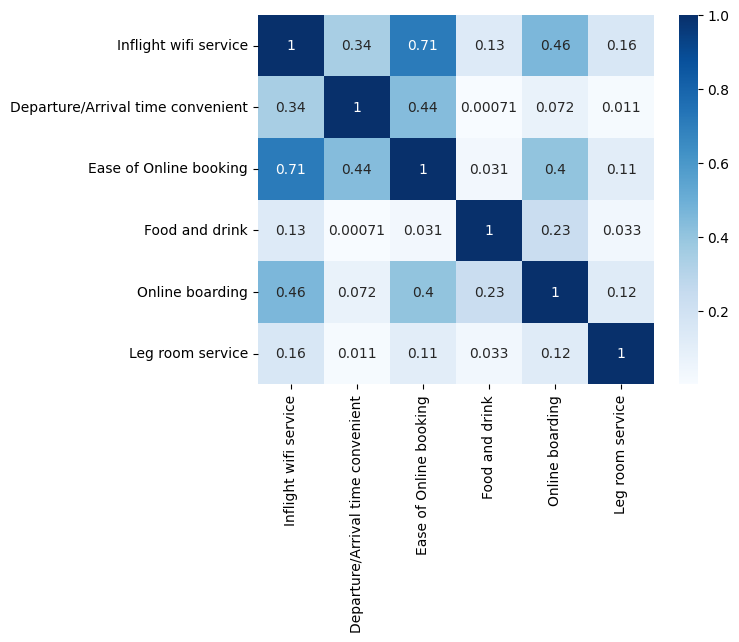

In [1174]:
df1 = df.loc[:, ['Inflight wifi service', 'Departure/Arrival time convenient',
                 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Leg room service']]

corr1 = df1.corr()
sns.heatmap(corr1, cmap="Blues", annot=True)

Что ж, очень высокой линейной зависимости ни один из аргументов в категории 1 не показывает. Максимальное значение = 0.71, но это кажется недостаточным показателем для объединения двух столбцов/удаления одного из них

Взглянем-ка теперь на категорию 2.

<Axes: >

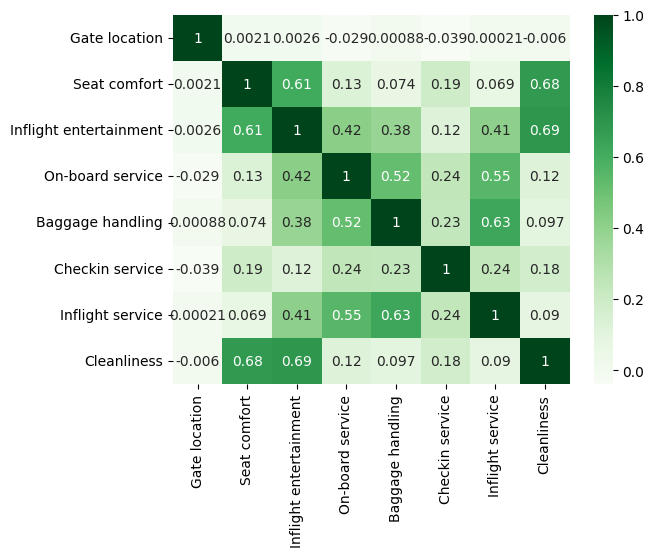

In [1175]:
df2 = df.loc[:, ['Gate location', 'Seat comfort', 'Inflight entertainment',
                 'On-board service', 'Baggage handling', 'Checkin service',
                 'Inflight service', 'Cleanliness']]

corr2 = df2.corr()
sns.heatmap(corr2, cmap="Greens", annot=True)

Здесь тоже максимальный коэффициент Пирсона почти 0.7, очень высоких зависимостей нет.

Ладно, тогда оставим пока эти признаки в покое.

## Итоги исследования данных

Итак, мы убрали NaN значения во всех столбцах (либо удалив их, либо присвоив им среднее числовых значений/отдельную категорию), преобразовали аномальные значения в нормальные (где-то присвоили им ближайший порог, где-то удалили, а где-то среднее адекватных значений).

Бинаризировали столбцы 'Customer Type' (0 = 'disloyal Customer', 1 = 'Loyal Customer'), 'Type of Travel' (0 = 'Business travel', 1 = 'Personal Travel').

Посмотрим теперь описание нашего датасета.

In [1176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128629 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             128629 non-null  object 
 1   Age                                128629 non-null  float64
 2   Customer Type                      128629 non-null  int64  
 3   Type of Travel                     128629 non-null  int64  
 4   Class                              128629 non-null  object 
 5   Flight Distance                    128629 non-null  float64
 6   Departure Delay in Minutes         128629 non-null  float64
 7   Arrival Delay in Minutes           128629 non-null  float64
 8   Inflight wifi service              128629 non-null  float64
 9   Departure/Arrival time convenient  128629 non-null  float64
 10  Ease of Online booking             128629 non-null  float64
 11  Gate location                      1286

Отлично, ненулевые значения остались только в столбцах Departure Delay in Minutes и Arrival Delay in Minutes, в которых они по определению и должны быть.

Заодно взглянем на текущий размер датасета

In [1177]:
df.shape

(128629, 23)

In [1178]:
now_size = df.shape[0]
print(f'Размер датасета после обработки данных составляет {now_size}')

Размер датасета после обработки данных составляет 128629


Узнаем, на сколько % мы уменьшили изначальный датасет в процессе разведочного анализа данных

In [1179]:
percentage = (now_size / original_size) * 100 # %
loss = 100 - percentage
print(f'Изначальный датасет уменьшился на {loss}% в процессе EDA')

Изначальный датасет уменьшился на 0.9631967970434232% в процессе EDA


Звучит неплохо, потери довольно незначительные (менее 1%)

## Преобразование категориальных признаков + Масштабирование данных

Остались несложные вещи.

Закодируем столбцы с категориальными признаками через One Hot Encoding / get_dummies

И заодно масштабируем наши данные

In [1180]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# напомню, все "оценки клиентом чего-либо" было решено оставить числовыми признаками
categorical = ['Gender', 'Class', 'satisfaction']
numeric_features = [col for col in df.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

df_transformed = column_transformer.fit_transform(df)

Добавим названия колонок для удобства

In [1181]:
# для варианта 1
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

df_transformed = pd.DataFrame(df_transformed, columns=lst)

df_transformed.head().transpose()

,0,1,2,3,4
Gender_Female,0.000000,1.000000,0.000000,0.000000,1.000000
Gender_Male,1.000000,0.000000,1.000000,1.000000,0.000000
Gender_Non-binary,0.000000,0.000000,0.000000,0.000000,0.000000
Class_Business,1.000000,1.000000,1.000000,1.000000,1.000000
Class_Eco,0.000000,0.000000,0.000000,0.000000,0.000000
Class_Eco Plus,0.000000,0.000000,0.000000,0.000000,0.000000
satisfaction_neutral or dissatisfied,1.000000,0.000000,0.000000,0.000000,0.000000
satisfaction_satisfied,0.000000,1.000000,1.000000,1.000000,1.000000
satisfaction_undecided,0.000000,0.000000,0.000000,0.000000,0.000000
Age,0.362832,0.247788,0.300885,0.380531,0.371681


Сохраним "чистые причёсанные" данные в отдельную таблицу, чтобы в дальнейшем было удобнее работать

In [1182]:
df_transformed.to_csv("airline_clients_clean.csv")

Отлично. На этом эта часть работы заканчивается.

*Пора приступать к следующей!*